In [2]:
from src.file_converter import (
    convert_doc_with_image_annotation,
    chunk_markdown_by_headers,
)

In [3]:
# Converting the pdf to markdown format with annotations for the images.
markdownDocument = convert_doc_with_image_annotation("docs/test-document-2.pdf")

2025-12-16 15:55:49,641 - INFO - detected formats: [<InputFormat.PDF: 'pdf'>]
2025-12-16 15:55:55,062 - INFO - Going to convert document batch...
2025-12-16 15:55:55,091 - INFO - Initializing pipeline for StandardPdfPipeline with options hash 5bc1909d1e8430ba75d1da6a9ed3bb9e
2025-12-16 15:55:55,254 - INFO - Loading plugin 'docling_defaults'
2025-12-16 15:55:55,315 - INFO - Registered picture descriptions: ['vlm', 'api']
2025-12-16 15:55:55,353 - INFO - Loading plugin 'docling_defaults'
2025-12-16 15:55:55,470 - INFO - Registered ocr engines: ['auto', 'easyocr', 'ocrmac', 'rapidocr', 'tesserocr', 'tesseract']
2025-12-16 15:55:56,032 - INFO - rapidocr cannot be used because onnxruntime is not installed.
2025-12-16 15:55:56,039 - INFO - easyocr cannot be used because it is not installed.
2025-12-16 15:56:44,660 - INFO - Accelerator device: 'cpu'
[INFO] 2025-12-16 15:56:44,800 [RapidOCR] base.py:22: Using engine_name: torch
[INFO] 2025-12-16 15:56:44,876 [RapidOCR] device_config.py:50: Usi

schema_name='DoclingDocument' version='1.8.0' name='test-document-2' origin=DocumentOrigin(mimetype='application/pdf', binary_hash=707534736041178518, filename='test-document-2.pdf', uri=None) furniture=GroupItem(self_ref='#/furniture', parent=None, children=[], content_layer=<ContentLayer.FURNITURE: 'furniture'>, meta=None, name='_root_', label=<GroupLabel.UNSPECIFIED: 'unspecified'>) body=GroupItem(self_ref='#/body', parent=None, children=[RefItem(cref='#/texts/0'), RefItem(cref='#/texts/1'), RefItem(cref='#/texts/2'), RefItem(cref='#/texts/3'), RefItem(cref='#/texts/4'), RefItem(cref='#/texts/5'), RefItem(cref='#/texts/6'), RefItem(cref='#/texts/7'), RefItem(cref='#/texts/8'), RefItem(cref='#/texts/9'), RefItem(cref='#/texts/10'), RefItem(cref='#/texts/11'), RefItem(cref='#/texts/12'), RefItem(cref='#/texts/13'), RefItem(cref='#/texts/14'), RefItem(cref='#/texts/15'), RefItem(cref='#/texts/16'), RefItem(cref='#/texts/17'), RefItem(cref='#/texts/18'), RefItem(cref='#/texts/19'), RefI
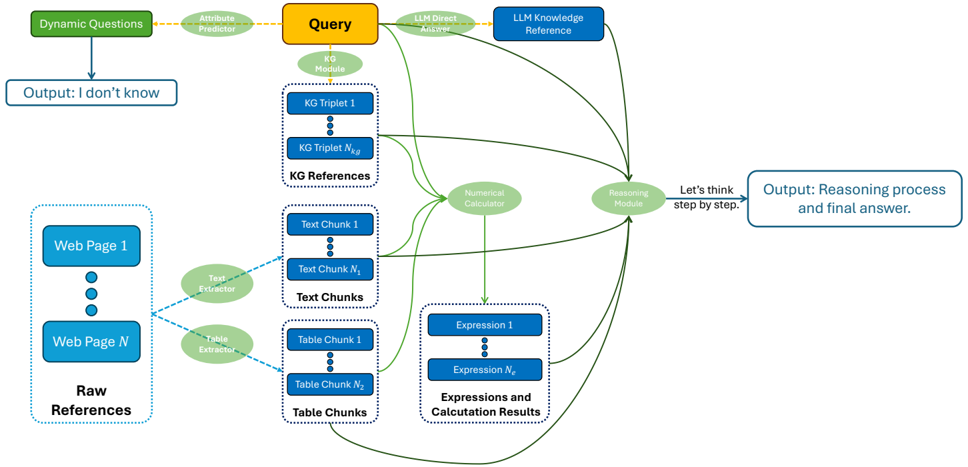
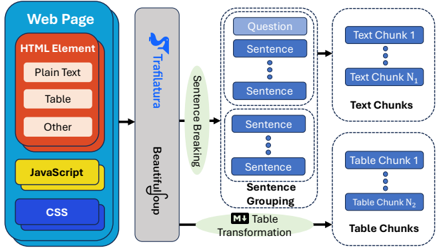
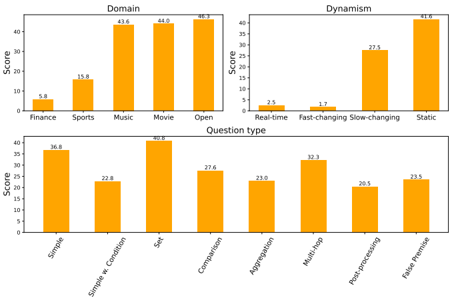
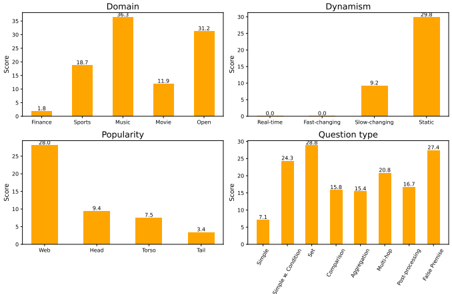

In [6]:
print(markdownDocument.document)

In [7]:
chunkedMarkdownDocument = chunk_markdown_by_headers(markdownDocument.document.export_to_markdown())
textsList = [ chunk for chunk in chunkedMarkdownDocument]

In [8]:

# markdownWithImageRef = export_to_md_with_image_ref(markdownDocument)
picturesList = markdownDocument.document.pictures
imageAnnotationsList = [el.annotations[0].text for el in picturesList if len(el.annotations)>0]
print(imageAnnotationsList)

['The diagram illustrates a dynamic question-answering process powered by a large language model (LLM), showcasing an intricate flow of data and operations. The process originates from a central yellow box labeled "Query," denoting the initial question posed to the system. From here, two distinct paths emerge: one leading to a blue box that states "Output: I don\'t know," indicating situations where the system cannot provide an answer, and another pathway that facilitates a more detailed and reasoned response. This pathway branches out into multiple components, including the "LLM Direct Answer," "LLM Knowledge Reference," "KG References," "Raw References," and a loop back to the query, enabling iterative refinement. The system extracts and processes information through various modules: the "Reasoning Module," with its sub-modules like "Numerical Calculator" and "Expressions and Calculation Results," as well as "KG References" that include "KG Triplet" and "Text Chunks." The integration

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2308\1864593035.py:3: DeprecationWarning: Field `annotations` is deprecated; use `meta` instead.
  imageAnnotationsList = [el.annotations[0].text for el in picturesList if len(el.annotations)>0]


In [9]:
# Utilities for working with images
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

base64ImageList = [str(img.image.uri).split(",",1)[1] for img in picturesList]

def convert_base64_to_image(imageString):
	imageBytes = base64.b64decode(imageString)
	display(Image.open(BytesIO(imageBytes)))

In [10]:
# Separating tables
hasSeparatedTablesFromDocument = markdownDocument.document.tables
tablesList = [table.export_to_html(doc=markdownDocument.document) for table in hasSeparatedTablesFromDocument]

In [11]:
# Text and Table Summaries
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [12]:
promptText = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additional comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}
"""
prefixPrompt = ChatPromptTemplate.from_template(promptText)
model = ChatGroq(temperature=0.5,model="llama-3.1-8b-instant")
summarizerChain = {"element": lambda x:x} | prefixPrompt | model | StrOutputParser()

In [13]:
textSummaries = summarizerChain.batch(textsList, {'max_concurrency': 1})
tableSummaries = summarizerChain.batch(tablesList, {'max_concurrency': 1})
print(textSummaries)
print(tableSummaries)

2025-12-16 16:00:54,357 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:54,653 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:54,914 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:55,276 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:55,469 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:55,674 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:55,885 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:56,099 - INFO - HTTP Request: POST https://api.groq.com/openai/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-16 16:00:56,328 - INFO - HTTP Request: POST http

['A hybrid RAG (Retrieval-Augmented Generation) system is proposed for complex reasoning tasks, aiming to enhance its performance.', "Ye Yuan is a researcher at Peking University's School of Computer Science, affiliated with the PKU-Anker Embodied AI Lab.", "Gongbo Sun is an associate from the University of Wisconsin-Madison's School of Computer, Data & Information Sciences, contactable at gsun43@wisc.edu.", 'This paper introduces a hybrid Retrieval-Augmented Generation (RAG) system optimized to enhance accuracy, reduce hallucinations, and improve reasoning capabilities. It achieves significant improvements in accuracy and error rates on the CRAG dataset, securing top positions in a Meta CRAG KDD Cup 2024 competition.', 'Chengwu Liu is affiliated with the State Key Laboratory of Multimedia Information Processing, Peking University, in Beijing, China.', 'Siqi Li is affiliated with the State Key Laboratory of Multimedia Information Processing at Peking University, Beijing, China.', "Jing

In [14]:
# Setting up the vector store (Using Qdrant)
import getpass
import os
from qdrant_client.models import Distance, VectorParams
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from langchain_google_genai import GoogleGenerativeAIEmbeddings

if not os.environ.get("GOOGLE_API_KEY"):
	os.environ["GOOGLE_API_KEY"] = getpass.getpass("Enter API key for Google Gemini: ")

embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")

QDRANT_URL = os.getenv("QDRANT_URL")
QDRANT_API_KEY = os.getenv("QDRANT_API_KEY")
client = QdrantClient(url=QDRANT_URL, api_key=QDRANT_API_KEY, timeout=30)

vector_size = len(embeddings.embed_query("sample text"))

if not client.collection_exists("conversational_tutoring"):
    client.create_collection(
        collection_name="conversational_tutoring",
        vectors_config=VectorParams(size=vector_size, distance=Distance.COSINE)
    )
vectorStore = QdrantVectorStore(
    client=client,
    collection_name="conversational_tutoring",
    embedding=embeddings,
)

2025-12-16 16:06:38,676 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333 "HTTP/1.1 200 OK"
2025-12-16 16:06:39,690 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 16:06:40,361 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/exists "HTTP/1.1 200 OK"
2025-12-16 16:06:40,828 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring "HTTP/1.1 200 OK"
2025-12-16 16:06:41,059 - INFO - HTTP Request: GET https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring "HTTP/1.1 200 OK"
2025-12-16 16:06:41,515 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/mo

In [15]:
from typing import Any, List, Optional
import uuid
import json
from pathlib import Path
from langchain_classic.storage import LocalFileStore
from langchain_core.documents import Document
from langchain_core.retrievers import BaseRetriever
# The storage layer for the parent documents
root_path = Path.cwd()/"data"
store = LocalFileStore(root_path) # Using file-based store for persistence, could also use in-memory store
idKey = "doc_id"

def serialize_document(doc: Document) -> bytes:
    return json.dumps({
        "page_content": doc.page_content,
        "metadata": doc.metadata
    }).encode("utf-8")
def deserialize_document(data: Optional[bytes])-> Optional[Document]:
    if data is None:
        return None
    obj = json.loads(data.decode("utf-8"))
    return Document(page_content=obj["page_content"], metadata=obj.get("metadata", {}))

class MultiVectorRetriever(BaseRetriever): # langchain compatible implementation
    vectorstore: Any
    docstore: Any
    id_key: str
    k: int = 10

    def _get_relevant_documents(self, query: str) -> List[Document]:
        sub_docs = self.vectorstore.similarity_search(query, k=self.k)

        parent_ids = []
        for doc in sub_docs:
            if self.id_key not in doc.metadata:
                raise ValueError(f"Missing `{self.id_key}` in document metadata")
            parent_ids.append(doc.metadata[self.id_key])

        # Deduplicate (preserve order)
        seen = set()
        parent_ids = [x for x in parent_ids if not (x in seen or seen.add(x))]

        parent_docs = self.docstore.mget(parent_ids)
        return [deserialize_document(data) for data in parent_docs if data is not None]
        # return [doc for doc in parent_docs if doc is not None]

# The retriever (empty to start)
retriever = MultiVectorRetriever(
    vectorstore=vectorStore,
    docstore=store,
    id_key=idKey,
)

In [16]:
# Inserting the summarized texts and original_texts to vector-store and document-store respectively

docIds = [str(uuid.uuid4()) for _ in textsList]
summaryTexts = [
    Document(page_content=summary, metadata={idKey: docIds[i]}) for i, summary in enumerate(textSummaries)
]
retriever.vectorstore.add_documents(summaryTexts)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in zip(docIds, textsList)])

# Add table-summaries and table-in-html format to the vector and document store respectively
tableIds = [str(uuid.uuid4()) for _ in tablesList]
summaryTables = [
    Document(page_content=summary, metadata={idKey: tableIds[i]}) for i, summary in enumerate(tableSummaries)
]
tablesDoc = [Document(page_content=html_table, metadata={idKey: tableIds[i]}) for i, html_table in enumerate(tablesList)]
retriever.vectorstore.add_documents(summaryTables)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in (zip(tableIds, tablesDoc))])

# Add image summaries and base64 images to their respective stores
imgIds = [str(uuid.uuid4()) for _ in imageAnnotationsList]
summaryImgs = [
    Document(page_content=summary, metadata={idKey: imgIds[i]}) for i, summary in enumerate(imageAnnotationsList)
]
imgsDoc = [Document(page_content=base64String, metadata={idKey: imgIds[i], "type": "image"}) for i, base64String in enumerate(base64ImageList)]
retriever.vectorstore.add_documents(summaryImgs)
retriever.docstore.mset([(doc_id, serialize_document(doc)) for doc_id, doc in zip(imgIds, imgsDoc)])

2025-12-16 16:07:13,772 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 16:07:17,118 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/points?wait=true "HTTP/1.1 200 OK"
2025-12-16 16:07:17,925 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 16:07:18,406 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/points?wait=true "HTTP/1.1 200 OK"
2025-12-16 16:07:19,073 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 16:07:19,506 - INFO - HTTP Request: PUT https://5e0668f4-54a2-4602-9c11-634e7

2025-12-16 16:07:34,519 - INFO - HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-embedding-001:batchEmbedContents "HTTP/1.1 200 OK"
2025-12-16 16:07:35,744 - INFO - HTTP Request: POST https://5e0668f4-54a2-4602-9c11-634e756c29c0.europe-west3-0.gcp.cloud.qdrant.io:6333/collections/conversational_tutoring/points/query "HTTP/1.1 200 OK"




--------------------------------------------------------------------------------


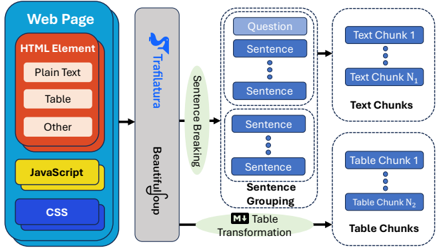



--------------------------------------------------------------------------------
## 4.1 Web Page Processing  
Web pages serve as a shared information source for all three tasks, containing a substantial amount of potentially valuable information that can aid the model in task completion. As a result, web page processing is a critical component of system design, directly impacting both the quality of the extracted information and the accuracy of subsequent language model generations.  
However, despite the abundance of information presented in natural language on web pages, extracting this information is not straightforward. This complexity is due to the frequent presence of significant amounts of noise that does not contribute relevant information necessary for task completion. Such noise can unnecessarily prolong the model's processing and reasoning time, potentially leading to misinterpretations. The types of noise encountered include decorative HTML tags used for typography, JavaS

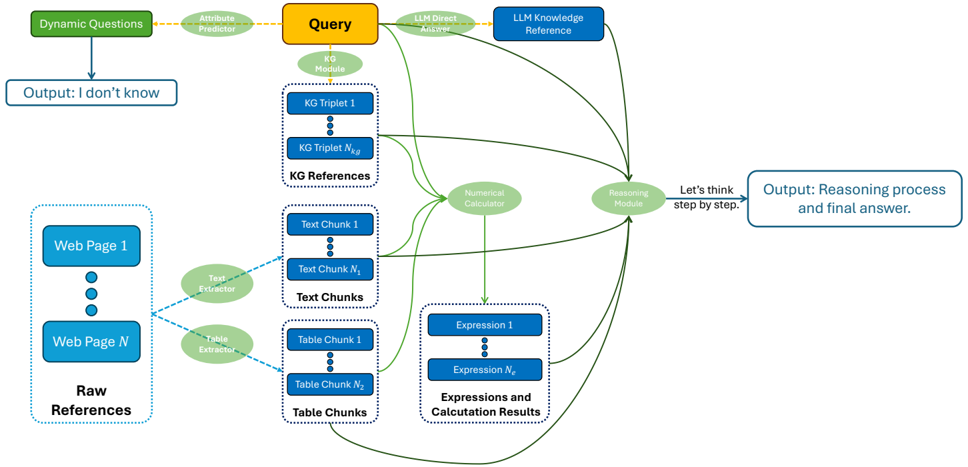



--------------------------------------------------------------------------------
## 2.3 Post-retrieval  
The post-retrieval phase includes re-ranking and filtering, which further refines the ranking results, and filtering out materials that are irrelevant to the querying topic.  
Re-ranking: Although vector similarity-based document retrieval can be executed efficiently and effectively, including in parallel [25, 30] or distributed systems [10], its capacity to reveal semantic relationships between queries and documents remains constrained [57]. This is where re-ranking becomes significant: typically bigger models, which offer greater accuracy but lower efficiency, can precisely reorder the limited set of documents retrieved. Some approaches [14, 48] embed the query-document pair in a single pass, facilitating cross-attention between sequences. These approaches enhance the evaluation of mutual information between the texts.  
Other studies employ large language models as few-shot ann

In [17]:
# Testing out the retrieval
docs = retriever._get_relevant_documents(
    "explain webpage processing")
for doc in docs:
    print("\n\n" + "-" * 80)
    if "type" in doc.metadata and doc.metadata["type"] == "image":
        convert_base64_to_image(doc.page_content)
    else:
        print(doc.page_content)